In [11]:
import pandas as pd
import os
import numpy as np
from tqdm import tqdm
from sklearn.metrics import jaccard_score, adjusted_mutual_info_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
src_dir = "/home/owkin/project/cytocommunity_results/unsupervised/2024-10-31_14-44-14/ensemble/ImageCollection"
ids_all = os.listdir(src_dir)

In [3]:
fpath = "ClusterAssignMatrix1_Time1_Fold1.csv"
file_list = [os.path.join(src_dir, id_current, fpath) for id_current in ids_all]
arrays = [pd.read_csv(file, header=None).to_numpy() for file in file_list]
combined_array = np.concatenate(arrays, axis=0)
result1 = np.argmax(combined_array, axis=1)

In [4]:
fpath = "ClusterAssignMatrix1_Time1_Fold3.csv"
file_list = [os.path.join(src_dir, id_current, fpath) for id_current in ids_all]
arrays = [pd.read_csv(file, header=None).to_numpy() for file in file_list]
combined_array = np.concatenate(arrays, axis=0)
result2 = np.argmax(combined_array, axis=1)

In [7]:
cm = confusion_matrix(result1, result2)
print(cm)

[[     0  68072      0      0      0]
 [   280  10616      2      1      0]
 [     0   4638      0  39060      0]
 [128888   8619      0   2233      0]
 [     0 106694      0      9      0]]


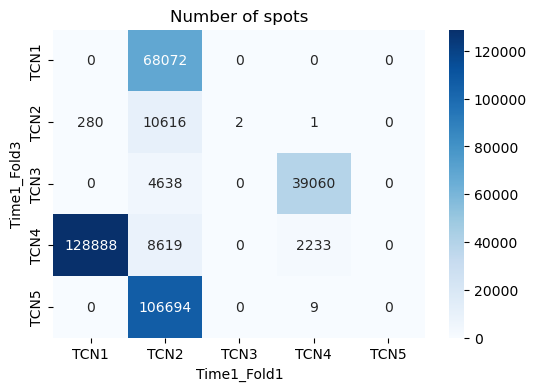

In [15]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f"TCN{i+1}" for i in range(5)], 
            yticklabels=[f"TCN{i+1}" for i in range(5)])
plt.xlabel("Time1_Fold1")
plt.ylabel("Time1_Fold3")
plt.title("Number of spots")
plt.show()
